In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import *

from matplotlib import pyplot as plt

In [21]:
with open ('data_after_cleaning1.csv') as file :
  df=pd.read_csv(file)
type(df)
#grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6}
#df['moy'] = df['moy'].map(grade_mapping)
df['moy'] = (df['moy'] > 55).astype(int)



In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [12]:
df.info(max_cols=len(df))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26012 entries, 0 to 26011
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   LunchType                      26012 non-null  int64
 1   TestPrep                       26012 non-null  int64
 2   Gender                         26012 non-null  int64
 3   ParentMaritalStatus            26012 non-null  int64
 4   ParentEduc_associate's degree  26012 non-null  int64
 5   ParentEduc_bachelor's degree   26012 non-null  int64
 6   ParentEduc_high school         26012 non-null  int64
 7   ParentEduc_master's degree     26012 non-null  int64
 8   ParentEduc_some college        26012 non-null  int64
 9   ParentEduc_some high school    26012 non-null  int64
 10  moy                            26012 non-null  int32
dtypes: int32(1), int64(10)
memory usage: 2.1 MB


In [13]:
all_columns = df.columns.tolist()

# Exclude the last column
columns_except_last = all_columns[:-1]

# Print the result
print("All Columns:", all_columns)
print("Columns Except Last:", columns_except_last)

All Columns: ['LunchType', 'TestPrep', 'Gender', 'ParentMaritalStatus', "ParentEduc_associate's degree", "ParentEduc_bachelor's degree", 'ParentEduc_high school', "ParentEduc_master's degree", 'ParentEduc_some college', 'ParentEduc_some high school', 'moy']
Columns Except Last: ['LunchType', 'TestPrep', 'Gender', 'ParentMaritalStatus', "ParentEduc_associate's degree", "ParentEduc_bachelor's degree", 'ParentEduc_high school', "ParentEduc_master's degree", 'ParentEduc_some college', 'ParentEduc_some high school']


In [23]:

feature_columns = ['LunchType', 'ParentMaritalStatus', 'PracticeSport', 'NrSiblings',
       'WklyStudyHours']

target_column = 'moy'
X = df[columns_except_last]
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are your feature and target variables
# X_train is assumed to be already preprocessed (e.g., one-hot encoding)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Use Recursive Feature Elimination (RFE)
rfe = RFE(estimator=rf_classifier, n_features_to_select=5)  # Adjust the number of features
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Display selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['LunchType', 'TestPrep', 'Gender', 'ParentEduc_master's degree',
       'ParentEduc_some high school'],
      dtype='object')


In [8]:
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [89]:
number =SelectKBest (f_classif, k=5)
rf_classifier =make_pipeline(number,RandomForestClassifier(random_state=42,max_depth = 10, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 50))
AdaBoost =make_pipeline(number,AdaBoostClassifier(random_state=42))
svm =make_pipeline(number,StandardScaler(),SVC(random_state=42,))
knns =make_pipeline(number,StandardScaler(),KNeighborsClassifier())


le modele  : Pipeline(steps=[('selectkbest', SelectKBest(k=5)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, min_samples_split=5,
                                        n_estimators=50, random_state=42))])
[[ 345  804]
 [ 252 2688]]
              precision    recall  f1-score   support

           0       0.58      0.30      0.40      1149
           1       0.77      0.91      0.84      2940

    accuracy                           0.74      4089
   macro avg       0.67      0.61      0.62      4089
weighted avg       0.72      0.74      0.71      4089

0.7417461482024945


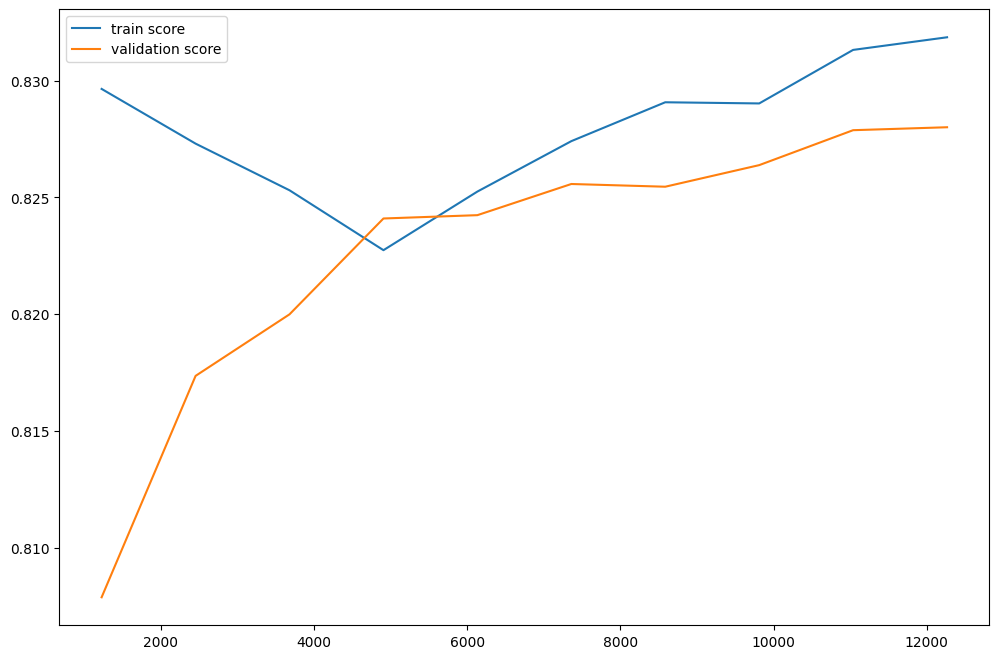

le modele  : Pipeline(steps=[('selectkbest', SelectKBest(k=5)),
                ('adaboostclassifier', AdaBoostClassifier(random_state=42))])
[[ 356  793]
 [ 262 2678]]
              precision    recall  f1-score   support

           0       0.58      0.31      0.40      1149
           1       0.77      0.91      0.84      2940

    accuracy                           0.74      4089
   macro avg       0.67      0.61      0.62      4089
weighted avg       0.72      0.74      0.71      4089

0.7419907067742725


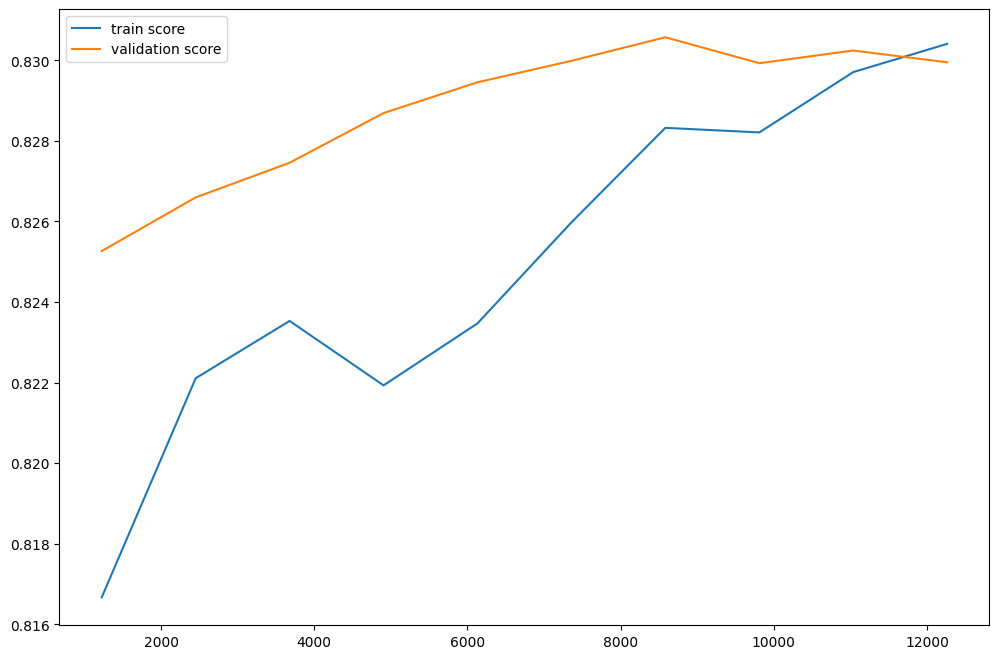

le modele  : Pipeline(steps=[('selectkbest', SelectKBest(k=5)),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=42))])
[[ 250  899]
 [ 187 2753]]
              precision    recall  f1-score   support

           0       0.57      0.22      0.32      1149
           1       0.75      0.94      0.84      2940

    accuracy                           0.73      4089
   macro avg       0.66      0.58      0.58      4089
weighted avg       0.70      0.73      0.69      4089

0.7344093910491563


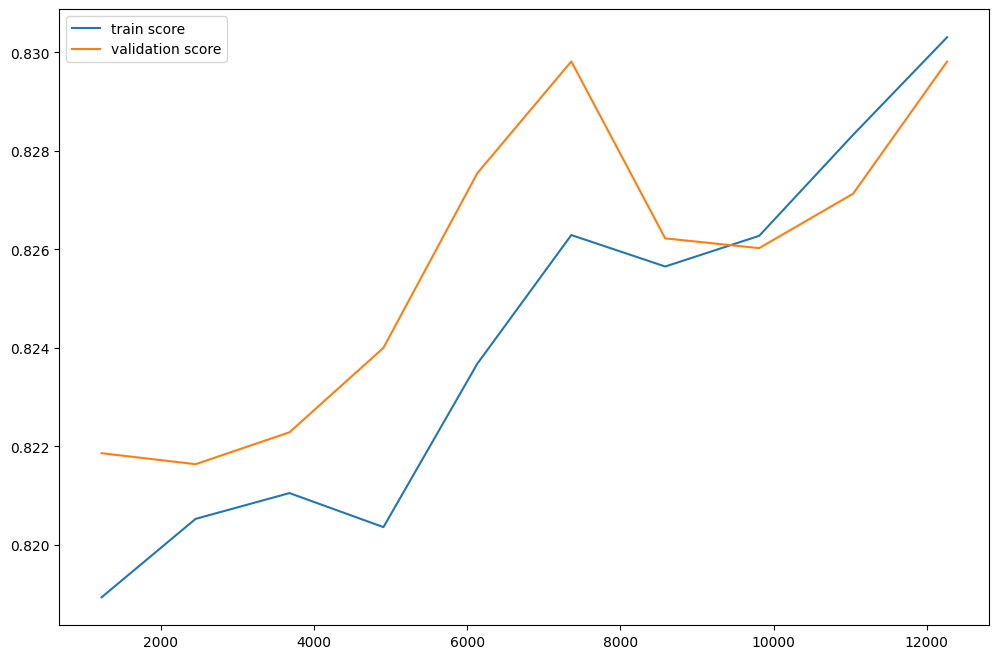

le modele  : Pipeline(steps=[('selectkbest', SelectKBest(k=5)),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])
[[ 491  658]
 [ 634 2306]]
              precision    recall  f1-score   support

           0       0.44      0.43      0.43      1149
           1       0.78      0.78      0.78      2940

    accuracy                           0.68      4089
   macro avg       0.61      0.61      0.61      4089
weighted avg       0.68      0.68      0.68      4089

0.6840303252629004


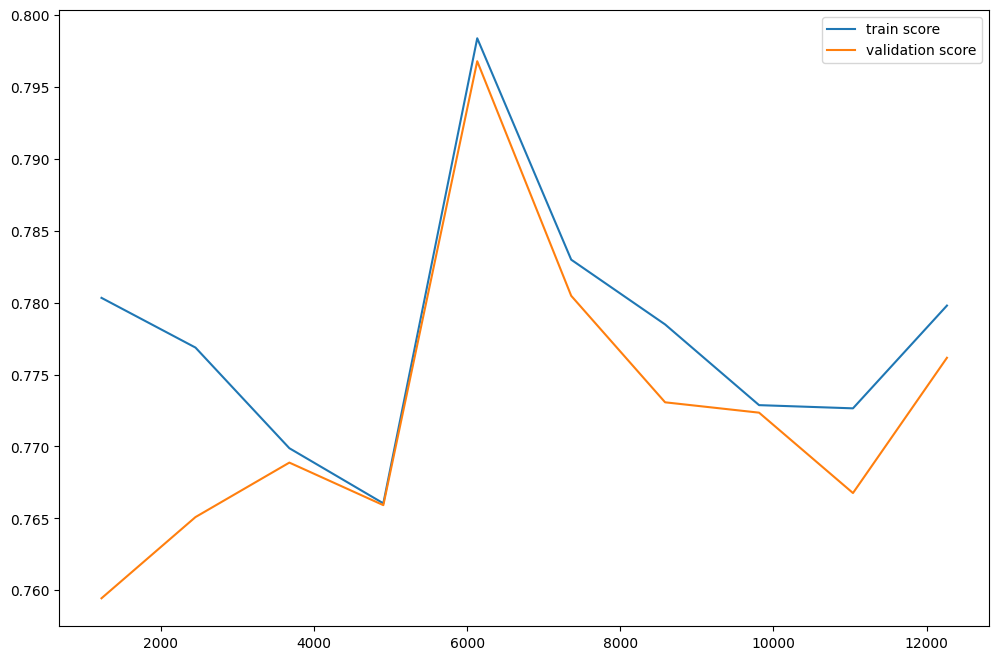

In [71]:
list_of_models=[rf_classifier,AdaBoost,svm,knns]
for model in list_of_models:
    print("le modele  :" , model)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

    N ,train_score, val_score = learning_curve(model, X_train,y_train, cv=4, scoring='f1' ,train_sizes=np.linspace(0.1, 1 ,10))
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1),label='train score')
    plt.plot(N, val_score.mean(axis=1),label='validation score')
    # Add legend
    plt.legend()

    #    Show the plot
    plt.show()



In [24]:

from sklearn.feature_selection import chi2

# Assuming you have a dataset and labels
# X, y = ...



# Initialize the Random Forest Classifier
rf_classifier =make_pipeline(SelectKBest (chi2, k=5),RandomForestClassifier(random_state=42))

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
N ,train_score, val_score = learning_curve(rf_classifier, X_train,y_train, cv=4, scoring='precision' ,train_sizes=np.linspace(0.1, 1 ,10))


# Access the SelectKBest instance from the pipeline
select_k_best = rf_classifier.named_steps['selectkbest']

# Get the boolean mask of selected features
selected_features_mask = select_k_best.get_support()

# Get the names of selected features
selected_features_names = X_train.columns[selected_features_mask]

# Print or use the selected feature names
print("Selected features:", selected_features_names)



[[  66  880]
 [  46 4211]]
              precision    recall  f1-score   support

           0       0.59      0.07      0.12       946
           1       0.83      0.99      0.90      4257

    accuracy                           0.82      5203
   macro avg       0.71      0.53      0.51      5203
weighted avg       0.78      0.82      0.76      5203

0.8220257543724774
Selected features: Index(['LunchType', 'TestPrep', 'Gender', 'ParentEduc_bachelor's degree',
       'ParentEduc_some high school'],
      dtype='object')


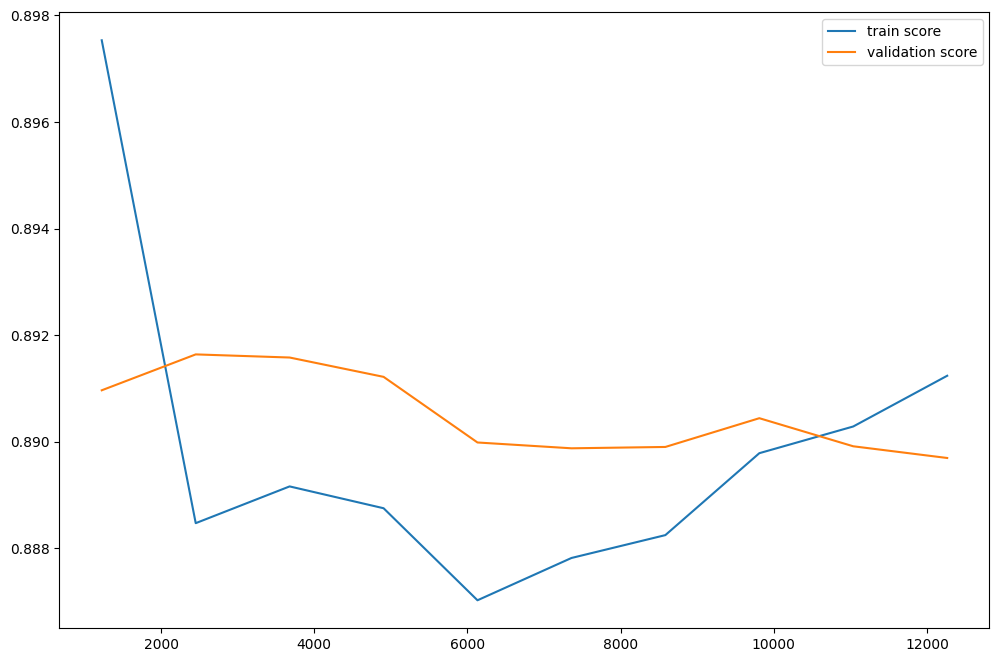

In [119]:
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1),label='train score')
plt.plot(N, val_score.mean(axis=1),label='validation score')
# Add legend
plt.legend()

# Show the plot
plt.show()

In [41]:
pd.DataFrame(rf_classifier.feature_importances_, index=X_train.columns).plot(kind='bar', figsize=(12, 8))

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

In [61]:
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest Classifier with SelectKBest
rf_classifier = make_pipeline(
    SelectKBest(f_classif, k=5),
    RandomForestClassifier(random_state=42)
)

# Define the hyperparameter grid to search
param_grid = {
    'randomforestclassifier__max_depth': [5, 10, 15],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__n_estimators': [50, 100, 200]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    rf_classifier,
    param_grid,
    cv=4,  # Number of cross-validation folds
    scoring='precision'  # Choose the appropriate scoring metric
)

# Fit the model with grid search
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from the grid search
best_rf_classifier = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_rf_classifier.predict(X_test)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Access the SelectKBest instance from the pipeline of the best model
best_select_k_best = best_rf_classifier.named_steps['selectkbest']

# Get the boolean mask of selected features
selected_features_mask = best_select_k_best.get_support()

# Get the names of selected features
selected_features_names = X_train.columns[selected_features_mask]

# Print or use the selected feature names
print("Selected features:", selected_features_names)


Best Hyperparameters: {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 50}
Confusion Matrix:
[[   0  403]
 [   0 3686]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       403
           1       0.90      1.00      0.95      3686

    accuracy                           0.90      4089
   macro avg       0.45      0.50      0.47      4089
weighted avg       0.81      0.90      0.85      4089

Accuracy: 0.9014428955734899
Selected features: Index(['Gender', 'ParentEduc', 'LunchType', 'TestPrep', 'TransportMeans'], dtype='object')


d:\cours\pds\jupvenv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\cours\pds\jupvenv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\cours\pds\jupvenv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import learning_curve
import numpy as np

# Define the pipeline with AdaBoostClassifier and SelectKBest
adaboost_pipeline = make_pipeline(
    SelectKBest(f_classif, k=5),
    AdaBoostClassifier(random_state=42)
)

# Define the hyperparameter grid to search
param_grid = {
    'adaboostclassifier__n_estimators': [50, 100, 200],
    'adaboostclassifier__learning_rate': [0.01, 0.1, 1.0]
}

# Create the GridSearchCV object
grid_search_adaboost = GridSearchCV(
    adaboost_pipeline,
    param_grid,
    cv=4,  # Number of cross-validation folds
    scoring='precision'  # Choose the appropriate scoring metric
)

# Fit the model with grid search
grid_search_adaboost.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params_adaboost = grid_search_adaboost.best_params_
print("Best Hyperparameters for AdaBoost:", best_params_adaboost)

# Get the best model from the grid search
best_adaboost_pipeline = grid_search_adaboost.best_estimator_

# Make predictions on the test set using the best model
y_pred_adaboost = best_adaboost_pipeline.predict(X_test)

# Print confusion matrix and classification report for AdaBoost
print("Confusion Matrix for AdaBoost:")
print(confusion_matrix(y_test, y_pred_adaboost))
print("\nClassification Report for AdaBoost:")
print(classification_report(y_test, y_pred_adaboost))

# Print accuracy for AdaBoost
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("Accuracy for AdaBoost:", accuracy_adaboost)

# Access the SelectKBest instance from the pipeline of the best AdaBoost model
best_select_k_best_adaboost = best_adaboost_pipeline.named_steps['selectkbest']

# Get the boolean mask of selected features for AdaBoost
selected_features_mask_adaboost = best_select_k_best_adaboost.get_support()

# Get the names of selected features for AdaBoost
selected_features_names_adaboost = X_train.columns[selected_features_mask_adaboost]

# Print or use the selected feature names for AdaBoost
print("Selected features for AdaBoost:", selected_features_names_adaboost)


Best Hyperparameters for AdaBoost: {'adaboostclassifier__learning_rate': 0.01, 'adaboostclassifier__n_estimators': 50}
Confusion Matrix for AdaBoost:
[[   0  403]
 [   0 3686]]

Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       403
           1       0.90      1.00      0.95      3686

    accuracy                           0.90      4089
   macro avg       0.45      0.50      0.47      4089
weighted avg       0.81      0.90      0.85      4089

Accuracy for AdaBoost: 0.9014428955734899
Selected features for AdaBoost: Index(['Gender', 'ParentEduc', 'LunchType', 'TestPrep', 'TransportMeans'], dtype='object')


d:\cours\pds\jupvenv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\cours\pds\jupvenv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\cours\pds\jupvenv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming your data is in X_train, X_test, y_train, y_test
# X_train and X_test are assumed to be already preprocessed (e.g., one-hot encoding)

# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]            # Minimum number of samples required to be at a leaf node
}

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')


Best Hyperparameters:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Test Accuracy: 0.7110938410724694


1.26.2


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create a Support Vector Classifier
svm_classifier = SVC(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10],               # Regularization parameter
    'kernel': ['linear', 'rbf'],    # Kernel type
    'gamma': ['scale', 'auto']      # Kernel coefficient (ignored for linear kernel)
}

# Perform GridSearchCV with cross-validation
grid_search_svm = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Display the best hyperparameters
best_params_svm = grid_search_svm.best_params_
print("Best Hyperparameters for Support Vector Machine:")
print(best_params_svm)

# Get the best Support Vector Machine model
best_svm_model = grid_search_svm.best_estimator_

# Make predictions on the test set using the best model
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the Support Vector Machine model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Test Accuracy for Support Vector Machine: {accuracy_svm}')


Best Hyperparameters for Support Vector Machine:
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Test Accuracy for Support Vector Machine: 0.7313587944920759


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create a K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_neighbors': [1,2,3,4,6,3, 5, 7],       # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting of neighbors ('uniform' or 'distance')
    'p': [1, 2,3,4,5,6]                     # Power parameter for the Minkowski distance metric
}

# Perform GridSearchCV with cross-validation
grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

# Display the best hyperparameters
best_params_knn = grid_search_knn.best_params_
print("Best Hyperparameters for K-Nearest Neighbors:")
print(best_params_knn)

# Get the best K-Nearest Neighbors model
best_knn_model = grid_search_knn.best_estimator_

# Make predictions on the test set using the best model
y_pred_knn = best_knn_model.predict(X_test)

# Evaluate the K-Nearest Neighbors model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Test Accuracy for K-Nearest Neighbors: {accuracy_knn}')


KeyboardInterrupt: 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import train_test_split

tree = DecisionTreeClassifier(random_state=17)

# Define the parameter grid
tree_params = {'max_depth': range(1, 10), 'max_features': range(1, 10), 'criterion': ['gini', 'entropy']}

# Initialize GridSearchCV
tree_grid = GridSearchCV(tree, tree_params, cv=10, scoring='recall')

# Fit the model on the training data
tree_grid.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_grid.predict(X_test)

# Calculate and print accuracy and recall scores
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Best Parameters:", tree_grid.best_params_)
print("Best Recall Score:", tree_grid.best_score_)
print("Accuracy Score:", accuracy)
print("Recall Score on Test Set:", recall)



Best Parameters: {'criterion': 'gini', 'max_depth': 1, 'max_features': 1}
Best Recall Score: 1.0
Accuracy Score: 0.7017407118732139
Recall Score on Test Set: 1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Initialize the Decision Tree Classifier with the specified parameters
clf = DecisionTreeClassifier(criterion='gini', max_depth=1, max_features=3)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Decision Tree Accuracy: {accuracy}")


Decision Tree Accuracy: 0.7017407118732139


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import train_test_split

# Assuming you have already defined and split your dataset into X_train, y_train
# If not, replace these lines with your dataset loading and splitting logic

# Load your dataset here and split it into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# Initialize the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(seed=17)

# Define the parameter grid
xgb_params = {
    'max_depth': range(3, 6),
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
}

# Initialize GridSearchCV
xgb_grid = GridSearchCV(xgb_classifier, xgb_params, cv=10, scoring='recall')

# Fit the model on the training data
xgb_grid.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_grid.predict(X_test)

# Calculate and print accuracy and recall scores
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Best Parameters:", xgb_grid.best_params_)
print("Best Recall Score:", xgb_grid.best_score_)
print("Accuracy Score:", accuracy)
print("Recall Score on Test Set:", recall)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best Recall Score: 1.0
Accuracy Score: 0.7017407118732139
Recall Score on Test Set: 1.0


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
from sklearn import tree


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)
print(accuracy)


d:\cours\pds\jupvenv\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.5963970206131993


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV


param_grid = {
    'base_estimator': [DecisionTreeClassifier(max_depth=5)],
    'n_estimators': [100, 200, 300],
    'learning_rate': [1.0, 2.0, 3.0]
}

# Create the AdaBoostClassifier
clf = AdaBoostClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Accuracy: ", best_accuracy)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy with Best Model: ", test_accuracy)

d:\cours\pds\jupvenv\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\cours\pds\jupvenv\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\cours\pds\jupvenv\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\cours\pds\jupvenv\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\cours\pds\jupvenv\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\cours\pds\jupvenv\lib\site-packages\sklearn\ensemble

Best Parameters:  {'base_estimator': DecisionTreeClassifier(max_depth=5), 'learning_rate': 3.0, 'n_estimators': 100}
Best Accuracy:  0.7312959956709957
Test Accuracy with Best Model:  0.7249841214850742
